In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
df =pd.read_csv("StudentMentalHealth2.csv")

NameError: name 'pd' is not defined

Understanding our dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2000 non-null   object 
 1   Age                    2000 non-null   int64  
 2   Course                 2000 non-null   object 
 3   current year of Study  2000 non-null   int64  
 4   CGPA                   2000 non-null   float64
 5   Marital status         2000 non-null   int64  
 6   Depression             2000 non-null   int64  
 7   Anxiety                2000 non-null   int64  
 8   Panic attack           2000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 140.8+ KB


In [22]:
df.isnull().sum()

Gender                   0
Age                      0
Course                   0
current year of Study    0
CGPA                     0
Marital status           0
Depression               0
Anxiety                  0
Panic attack             0
dtype: int64

Dealing with null values

In [23]:
# there is only one null value in age column so filling with mean value of age
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [24]:
df.isnull().sum()

Gender                   0
Age                      0
Course                   0
current year of Study    0
CGPA                     0
Marital status           0
Depression               0
Anxiety                  0
Panic attack             0
dtype: int64

cleaning the CGPA column as it has range we will consider the upper limit

In [25]:
# for 1st dataset/
# # Rename the 'What is your CGPA?' column to 'CGPA'
# df.rename(columns={'What is your CGPA?': 'CGPA'}, inplace=True)

# # Extract the upper value of the range and convert it to a numeric format
# df['CGPA'] = df['CGPA'].apply(lambda x: float(x.split('-')[1].strip()) if '-' in x else float(x))


In [26]:
# df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
# df['Do you have Anxiety?'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
# df['Do you have Panic attack?'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

In [27]:
df

,Gender,Age,Course,current year of Study,CGPA,Marital status,Depression,Anxiety,Panic attack
0,Male,25,Psychology,1,5.45,0,0,0,0
1,Female,20,Mathematics,1,6.55,0,1,0,1
2,Male,25,CTS,1,2.02,0,0,0,1
3,Male,22,Mathematics,3,4.09,1,0,1,0
4,Male,18,Human Resources,1,6.15,1,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,Male,22,Communication,4,8.51,1,1,1,0
1996,Female,25,Radiography,2,9.66,1,1,1,1
1997,Male,25,Nursing,1,9.07,1,0,1,0
1998,Male,21,CTS,1,9.47,0,1,0,0


# DataWrangling

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2000 non-null   object 
 1   Age                    2000 non-null   int64  
 2   Course                 2000 non-null   object 
 3   current year of Study  2000 non-null   int64  
 4   CGPA                   2000 non-null   float64
 5   Marital status         2000 non-null   int64  
 6   Depression             2000 non-null   int64  
 7   Anxiety                2000 non-null   int64  
 8   Panic attack           2000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 140.8+ KB


## Depression vs age group

C:\Users\manis\AppData\Local\Temp\ipykernel_20644\1396523301.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_depression_by_age_group = df.groupby('AgeGroup')['Depression'].mean() * 100


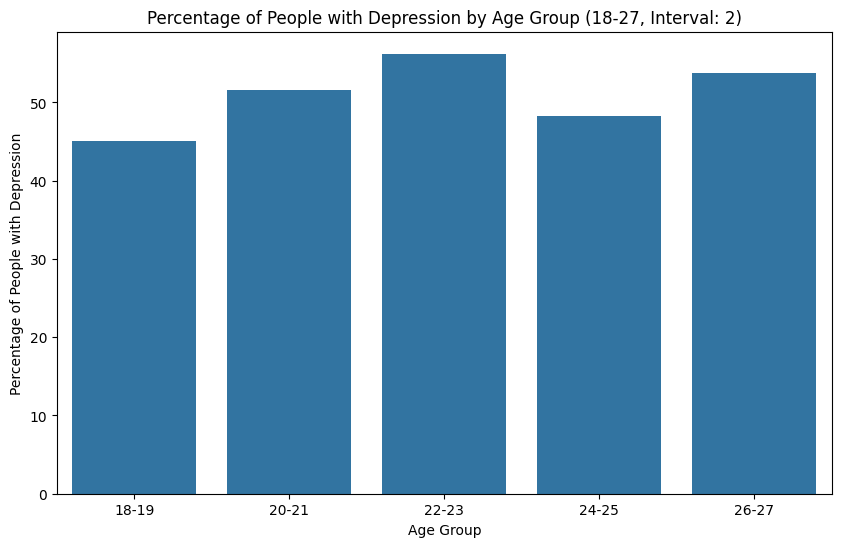

In [29]:

# Define the age range and interval
age_start = 18
age_end = 27
interval = 2

# Create age groups
bins = range(age_start, age_end + interval, interval)
labels = [f'{i}-{i+interval-1}' for i in bins[:-1]]

# Convert 'Depression' column to binary (1 for 'Yes', 0 for 'No')
# df['Do you have Depression?'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})

# Create a new 'AgeGroup' column
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate the percentage of people with depression
percentage_depression_by_age_group = df.groupby('AgeGroup')['Depression'].mean() * 100

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_depression_by_age_group.index, y=percentage_depression_by_age_group.values)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage of People with Depression')
plt.title('Percentage of People with Depression by Age Group (18-27, Interval: 2)')

# Show the plot
plt.show()


## Destribution of mental health condition

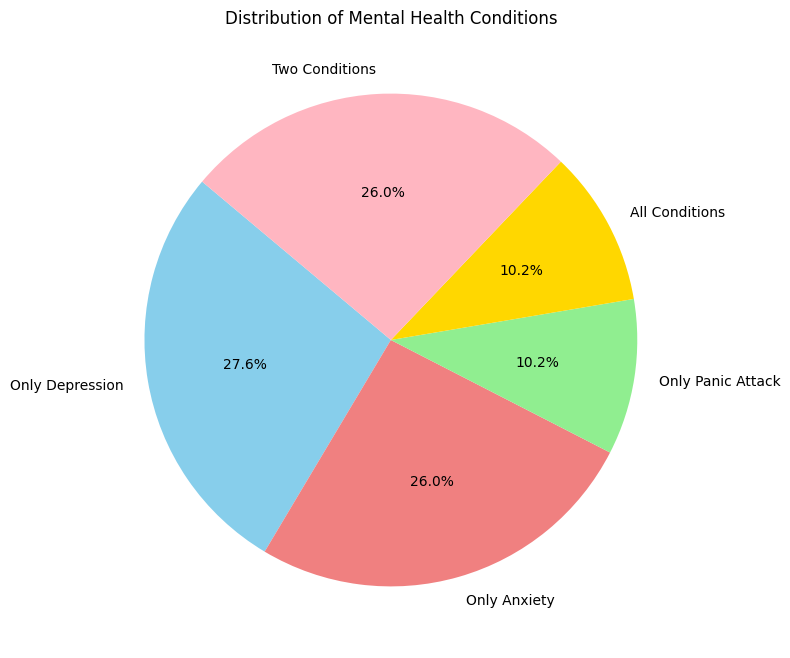

In [30]:
import matplotlib.pyplot as plt

# Assuming 'Depression', 'Do you have Anxiety?', and 'Do you have Panic attack?' are binary columns (e.g., 'Yes' or 'No')

# # Convert columns to binary (1 for 'Yes', 0 for 'No')
# df['Depression'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
# df['Anxiety'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
# df['PanicAttack'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Calculate a new column representing the count of mental health conditions for each person
df['TotalConditions'] = df['Depression'] + df['Anxiety'] + df['Panic attack']

# Count the occurrences of each combination
condition_counts = df['TotalConditions'].value_counts()

# Labels for the pie chart
labels = ['Only Depression', 'Only Anxiety', 'Only Panic Attack', 'All Conditions', 'Two Conditions']

# Values for each condition
values = [condition_counts.get(1, 0), condition_counts.get(2, 0), condition_counts.get(3, 0),
          condition_counts.get(3, 0), condition_counts.get(2, 0)]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink'])

# Adding title
plt.title('Distribution of Mental Health Conditions')

# Show the plot
plt.show()


## Depression vs Maratial status

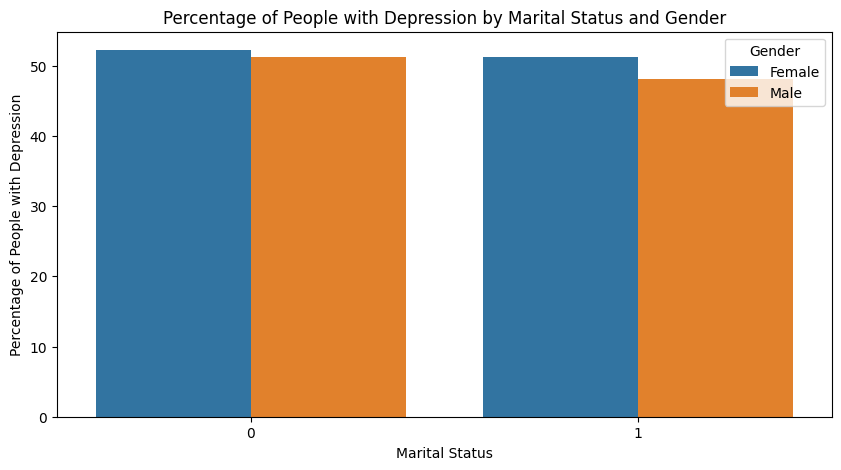

In [31]:


# Group by gender and marital status, then calculate the percentage of people with depression
percentage_depression_by_gender_marital = df.groupby(['Gender', 'Marital status'])['Depression'].mean() * 100

# Reset the index to make it easier for plotting
percentage_depression_by_gender_marital = percentage_depression_by_gender_marital.reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Marital status', y='Depression', hue='Gender', data=percentage_depression_by_gender_marital)

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Percentage of People with Depression')
plt.title('Percentage of People with Depression by Marital Status and Gender')

# Show the plot
plt.show()


## Trends of Depression by Course

C:\Users\manis\AppData\Local\Temp\ipykernel_20644\2749278627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentage_depression_by_course.index, y=percentage_depression_by_course.values, palette='viridis')


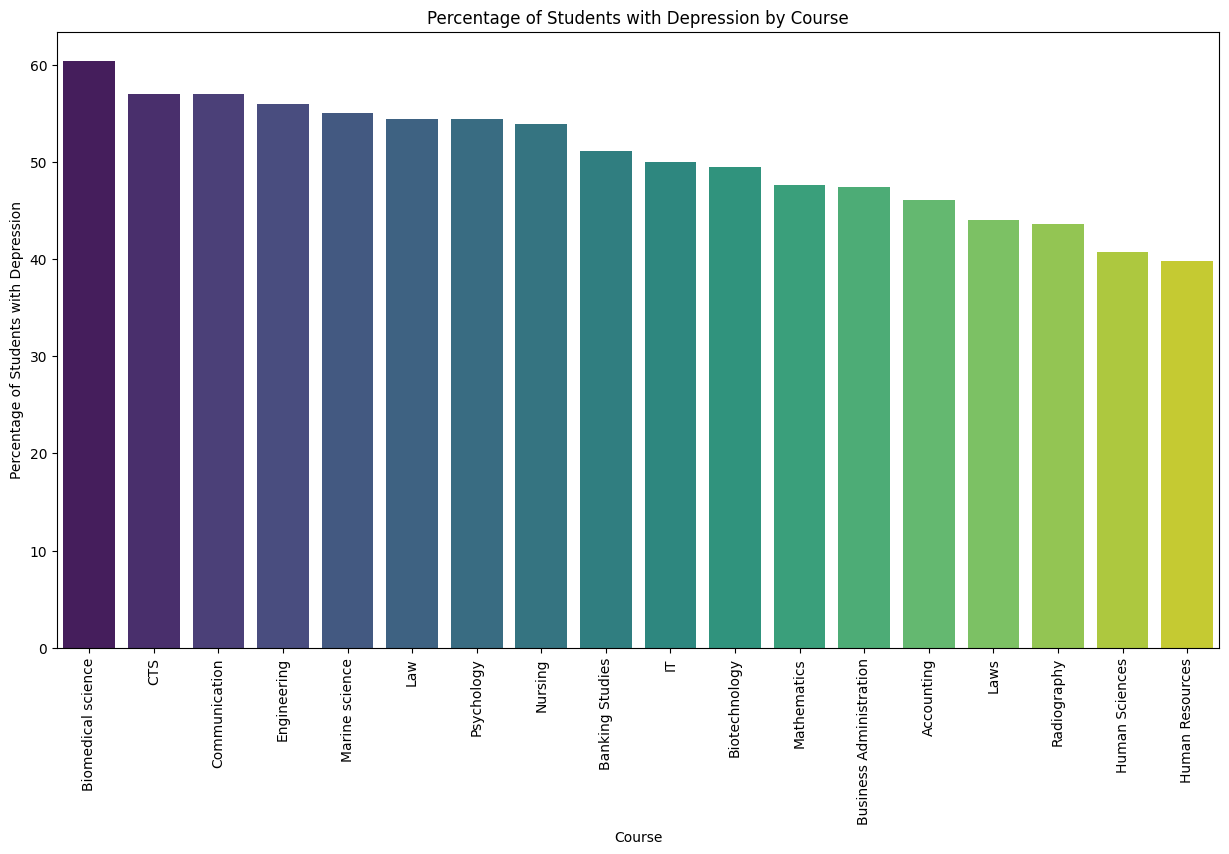

In [32]:

# Group by course and calculate the percentage of students with depression
percentage_depression_by_course = df.groupby('Course')['Depression'].mean() * 100

# Sort the values in descending order
percentage_depression_by_course = percentage_depression_by_course.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x=percentage_depression_by_course.index, y=percentage_depression_by_course.values, palette='viridis')

# Adding labels and title
plt.xlabel('Course')
plt.ylabel('Percentage of Students with Depression')
plt.title('Percentage of Students with Depression by Course')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Depression vs CGPA

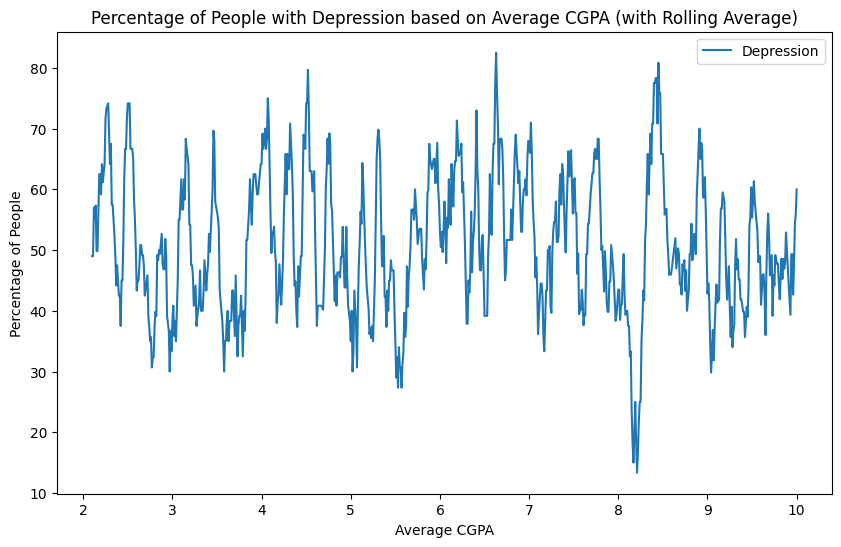

In [33]:


# Group by CGPA and calculate the percentage of people with depression
percentage_depression = df.groupby('CGPA')['Depression'].mean() * 100

# Apply a rolling average with a window size of your choice (e.g., 5)
rolling_average = percentage_depression.rolling(window=10).mean()

# Plotting the line graph with rolling average
plt.figure(figsize=(10, 6))
sns.lineplot(x=rolling_average.index, y=rolling_average.values, label='Depression')

# Adding labels and title
plt.xlabel('Average CGPA')
plt.ylabel('Percentage of People')
plt.title('Percentage of People with Depression based on Average CGPA (with Rolling Average)')

# Show the plot
plt.show()
